In [2]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
from matplotlib import pyplot

from sklearn.model_selection import train_test_split

#Import the KNN module for Classification
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Inport the module for printing the classification report
from sklearn.metrics import classification_report

In [3]:
filename = 'C:/Users/Gayathri/Desktop/MS UNT/heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(filename)



In [4]:
df.head(5)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C5F398A198>,
      dtype=object)

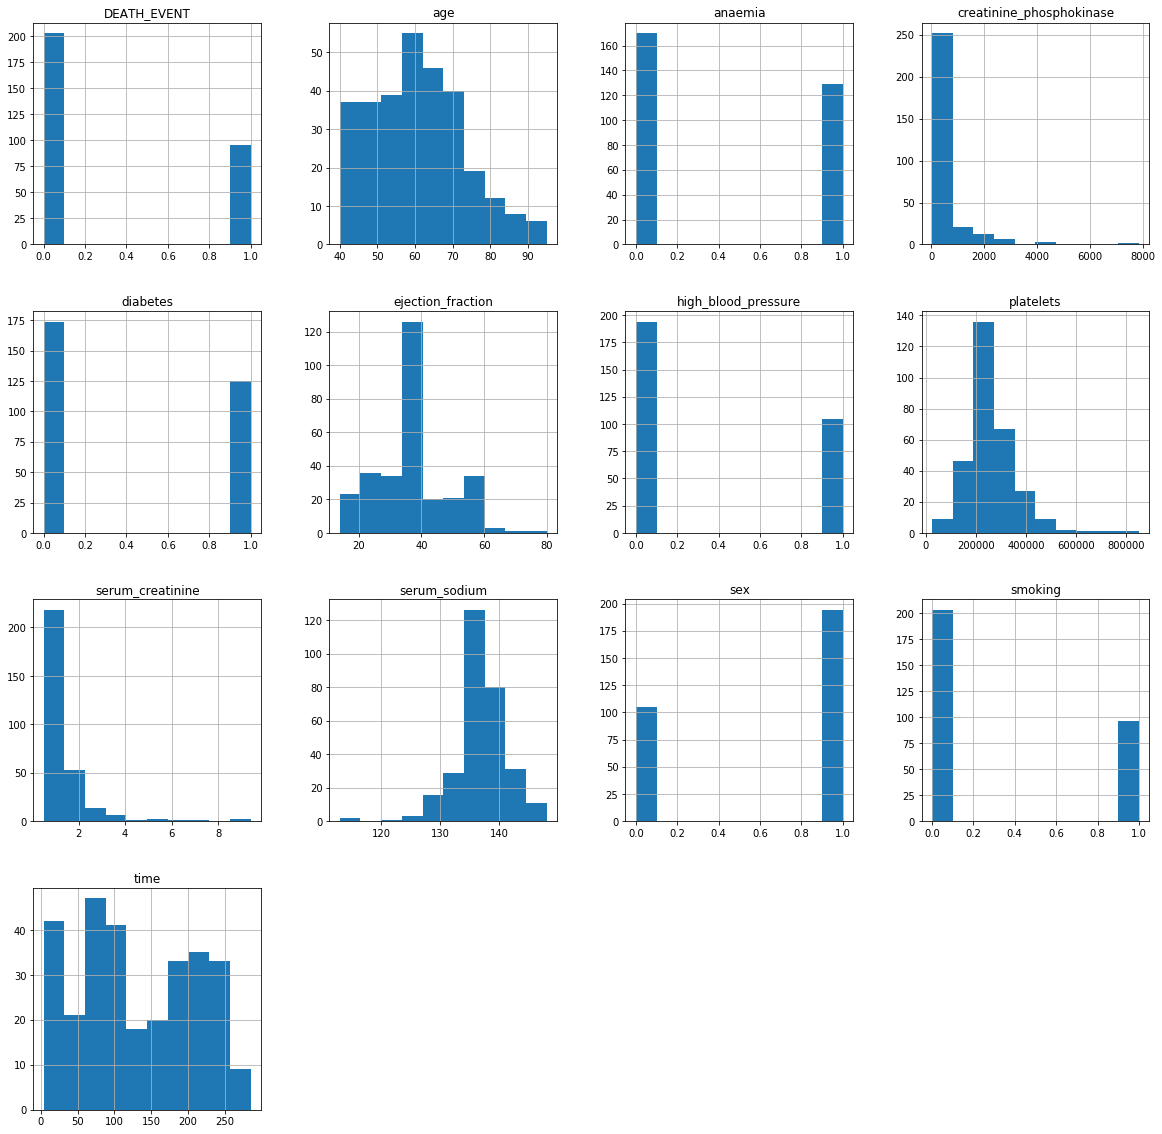

In [8]:
df.hist(figsize=(20,20))

age                             AxesSubplot(0.125,0.71587;0.168478x0.16413)
anaemia                      AxesSubplot(0.327174,0.71587;0.168478x0.16413)
creatinine_phosphokinase     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
diabetes                     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
ejection_fraction              AxesSubplot(0.125,0.518913;0.168478x0.16413)
high_blood_pressure         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
platelets                   AxesSubplot(0.529348,0.518913;0.168478x0.16413)
serum_creatinine            AxesSubplot(0.731522,0.518913;0.168478x0.16413)
serum_sodium                   AxesSubplot(0.125,0.321957;0.168478x0.16413)
sex                         AxesSubplot(0.327174,0.321957;0.168478x0.16413)
smoking                     AxesSubplot(0.529348,0.321957;0.168478x0.16413)
time                        AxesSubplot(0.731522,0.321957;0.168478x0.16413)
DEATH_EVENT                       AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: objec

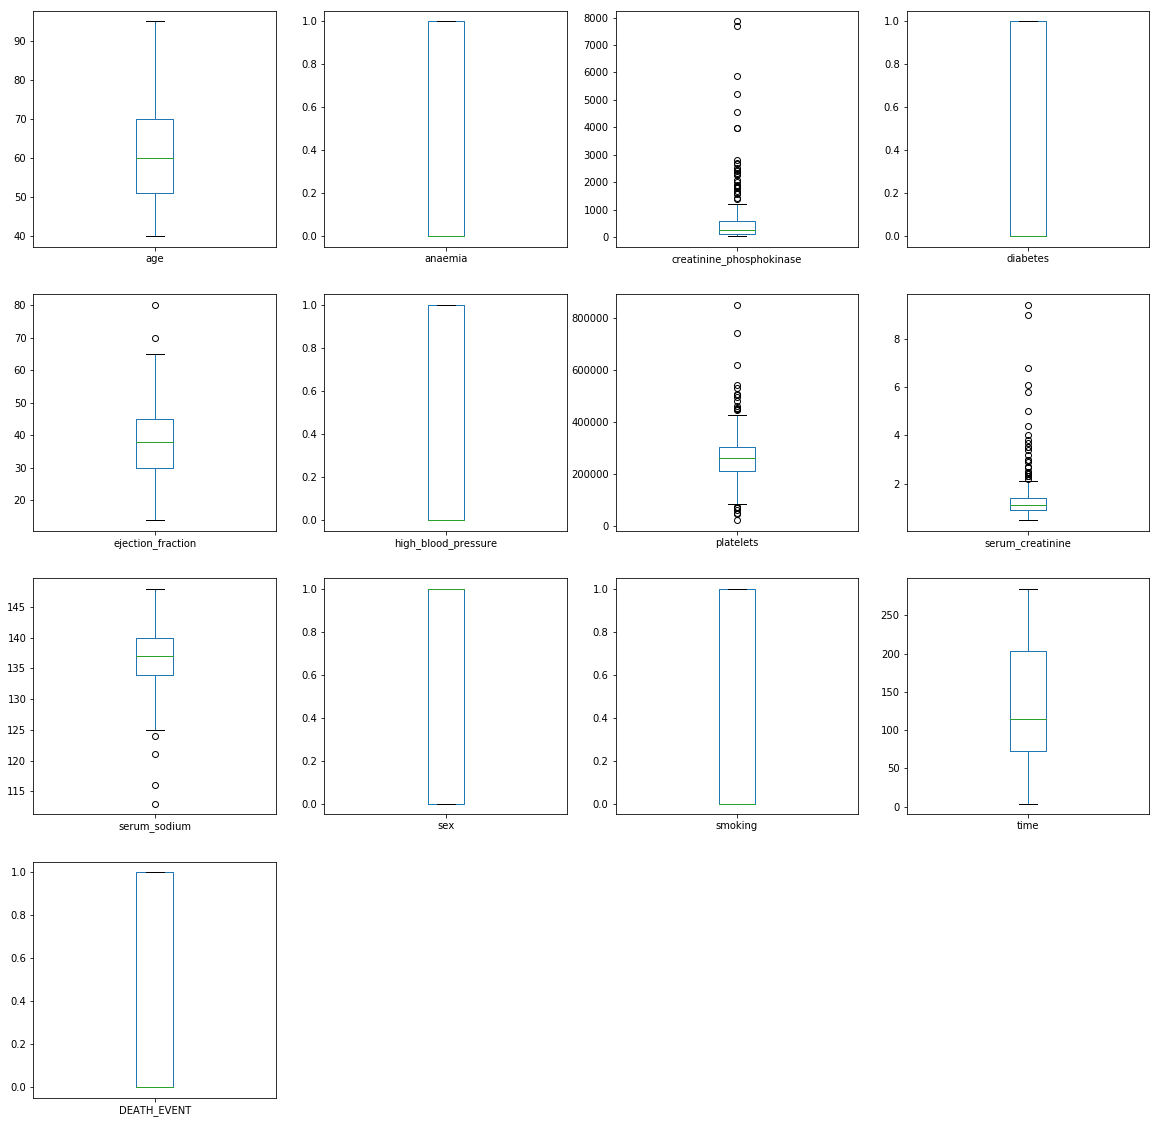

In [9]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,20))

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc_X = StandardScaler()
df_transform =  pd.DataFrame(sc_X.fit_transform(df.drop(['DEATH_EVENT'],axis = 1)),columns=['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium', 'sex','smoking','time'])
                
       
                  
                      
                    
                        
 

In [12]:
df_transform.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


In [13]:
df_transform['predict_death'] = df['DEATH_EVENT']

In [15]:
df_transform.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,predict_death
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502,1
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691,1
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785,1
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785,1
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879,1


In [18]:
array = df_transform.values


In [25]:
X = array[:,1:12]
Y = array[:,12]

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33, random_state=7)

In [27]:
model = KNeighborsClassifier(n_neighbors=7)

# Train the model with the training data set
model.fit(X_train,Y_train)

# test the model
predicted_value = model.predict(X_test)

# Get the classification report and print
report= classification_report(Y_test, predicted_value)
print(report)

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87        72
         1.0       0.71      0.44      0.55        27

    accuracy                           0.80        99
   macro avg       0.76      0.69      0.71        99
weighted avg       0.79      0.80      0.78        99



In [28]:
# Split into 10 folds
num_fold =  10

#Fix the random seed
#Use the same seed as before

seed = 7

k_fold = KFold(n_splits=num_fold,random_state=seed)

#For the classification we use accuracy for scoring
scoring = 'accuracy'

result=cross_val_score(model, X, Y, cv=k_fold, scoring=scoring)

print("Accuracy:  %.3f (%.3f)"% (result.mean(), result.std()))

Accuracy:  0.723 (0.197)


C:\Users\Gayathri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
